# Transmission of Air with $O_3$ absorption including Chapuis band
===============================================================================================


The purpose is to calculate the transmission of air due to $O_3$ component at OHP site.

- author : Sylvie Dagoret-Campagne
- date :May  2nd 2017
- Update May 9th 2017

$O_3$ from Hitran and $O_3$ from Chapuis measrement in 2014

In [1]:
import numpy as np
import pandas as pd

# Set up matplotlib and use a nicer set of plot parameters
#%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

#import matplotlib as mpl

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Initialisation

## Constants

In [3]:
Pa_to_Atm = 0.00000986923267
hPa_to_Atm=Pa_to_Atm*100  # libRadTran provides pressure in hPa
Atm_to_Pa = 1.01325*1e5 
Atm_to_hPa = 1.01325*1e3 

In [4]:
m_to_cm=100.

## Initialize Hitran/Hapi

In [5]:
from hapi import *

HAPI version: 1.1.0.6
To get the most up-to-date version please check http://hitran.org/hapi


In [6]:
db_begin('data')

Using data

CO2
                     Lines parsed: 7869
H2O
                     Lines parsed: 110080
NO2
                     Lines parsed: 5873
O
                     Lines parsed: 80101
O2
                     Lines parsed: 1180
O3
                     Lines parsed: 16584


## Initialise O3 from Libradtran

In [41]:
!head O3Chapuis/O3chapuis.txt

# Graph points extracted by GraphClick
#Index Export Column Header	x	y
# From article Atmos Meas Tech 7,609-624,2014
# O3 Ozone Chapuis band
# X in nm
# Y x 10^-21 cm^2/molecule
1	540.023	2.928
2	541.351	2.974
3	542.405	3.036
4	544.065	3.123


In [40]:
libradtran_dataO3_path='O3Chapuis/O3chapuis.txt'

In [9]:
#df_rto3=pd.read_csv(libradtran_dataO3_path,header=5,delimiter='\t')
#df_rto3.columns = ['WL','T266','T263','T298']

In [42]:
data_rto3=np.loadtxt(libradtran_dataO3_path,skiprows=6)

In [60]:
wl_o3=data_rto3[:,1]
xsecChapuis_o3=data_rto3[:,2]*1e-21


In [47]:
xsecChapuis_o3

array([ 2.928,  2.974,  3.036,  3.123,  3.181,  3.212,  3.263,  3.311,
        3.369,  3.423,  3.468,  3.519,  3.56 ,  3.632,  3.69 ,  3.769,
        3.846,  3.909,  3.998,  4.082,  4.162,  4.252,  4.336,  4.394,
        4.467,  4.525,  4.6  ,  4.653,  4.691,  4.758,  4.797,  4.816,
        4.804,  4.749,  4.69 ,  4.649,  4.611,  4.547,  4.487,  4.459,
        4.428,  4.43 ,  4.447,  4.483,  4.529,  4.577,  4.633,  4.7  ,
        4.787,  4.843,  4.915,  4.981,  5.042,  5.138,  5.195,  5.222,
        5.191,  5.136,  5.063,  4.989,  4.915,  4.841,  4.784,  4.727,
        4.669,  4.58 ,  4.506,  4.437,  4.37 ,  4.307,  4.235,  4.154,
        4.078,  3.989,  3.927,  3.877,  3.799,  3.73 ,  3.675,  3.616,
        3.578,  3.537,  3.487,  3.449,  3.392,  3.338,  3.261,  3.228,
        3.177,  3.127,  3.089,  3.037,  3.017])

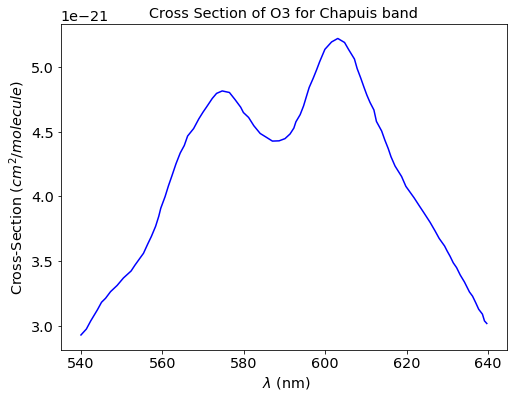

In [73]:
plt.plot(wl_o3,xsecChapuis_o3,'b')
plt.title('Cross Section of O3 for Chapuis band')
plt.xlabel(' $\lambda$ (nm)')
plt.ylabel('Cross-Section ($cm^{2}/molecule $)')

## Initialisation of atmosphere at OHP

In [13]:
atm_ground_file='atm_OHP_ground.csv'
atm_groundsum_file='atm_OHP_groundsum.csv'

In [14]:
df=pd.read_csv(atm_ground_file)

In [15]:
df  # Pressure in hPa, T in Kelvin, densities in molecules per cm^3

,Unnamed: 0,P,T,Air,O2,O3,PWV,CO2,NO2
0,afglus_grd,937.22595,283.98,2.390570e+19,5.000690e+18,6.785990e+11,1.592780e+17,7.895830e+15,550316000.0
1,afglmw_grd,937.82373,269.93,2.516510e+19,5.262860e+18,7.031330e+11,9.457420e+16,8.309770e+15,579166000.0
2,afglms_grd,939.39349,291.28,2.335970e+19,4.886270e+18,7.539820e+11,3.629170e+17,7.715160e+15,537723000.0


In [16]:
d_O3_us=df['O3'][0]  # molec/cm^3 : H2O density  for US standard atmosphere at ground
d_O3_mw=df['O3'][1] # molec/cm^3 : H2O density  for Mid latitude winter atmosphere at ground
d_O3_ms=df['O3'][2] # molec/cm^3 : H2O density  for Mid latitude summer atmosphere at ground

In [17]:
P_us=df['P'][0] # Pressure at ground in hPa  for US standard atmosphere at ground
P_mw=df['P'][1] # Pressure at ground in hPa for Mid latitude winter atmosphere at ground
P_ms=df['P'][2] # Pressure at ground in hPa for Mid latitude summer atmosphere at ground

In [18]:
T_us=df['T'][0] # Temperature at ground in hPa  for US standard atmosphere at ground
T_mw=df['T'][1] # Temperature at ground in hPa for Mid latitude winter atmosphere at ground
T_ms=df['T'][2] # Temperature at ground in hPa for Mid latitude summer atmosphere at ground

In [19]:
print d_O3_us, d_O3_mw, d_O3_ms

678599000000.0 703133000000.0 753982000000.0


In [20]:
Patm_us = P_us*hPa_to_Atm
Patm_mw = P_mw*hPa_to_Atm
Patm_ms = P_ms*hPa_to_Atm

In [21]:
print Patm_us,Patm_mw,Patm_ms

0.924970096491 0.925560059482 0.927109292149


## Parameters

In [22]:
Distance_source_tel=200*m_to_cm

In [23]:
WLMIN=200.  # nm
WLMAX=1200. # nm

NUMIN=1e7/WLMAX  # cm-1
NUMAX=1e7/WLMIN  # cm-1

- Not working with HiTran

In [24]:
# fetch_by_ids('O3',[16,17,18,19,20],NUMIN,NUMAX)

In [25]:
Ozone_XSecFiles=['O3_200.0_0.0_29164.0-40798.0_04.xsc','O3_220.0_0.0_29164.0-40798.0_04.xsc',
'O3_240.0_0.0_29164.0-40798.0_04.xsc','O3_260.0_0.0_29164.0-40798.0_04.xsc',
'O3_280.0_0.0_29164.0-40798.0_04.xsc', 'O3_300.0_0.0_29164.0-40798.0_04.xsc']

In [26]:
NUMIN=29164.0
NUMAX=40798.0

In [27]:
file=os.path.join('O3Xsec',Ozone_XSecFiles[5])
df=pd.read_table(file,delimiter=' ',usecols=[1,2,3,4,5,6,7,8,9,10]) 
arr=df.values.flatten()
arr = arr[~np.isnan(arr)]

In [28]:
wavenum=np.linspace(NUMIN,NUMAX,arr.shape[0])

# Absorption coefficient

## Absorption coefficient for $O_3$ Chapuis band

In [62]:
k_O3Chapuis_us=d_O3_us*xsecChapuis_o3  # cm^-1
k_O3Chapuis_mw=d_O3_mw*xsecChapuis_o3  # cm^-1
k_O3Chapuis_ms=d_O3_ms*xsecChapuis_o3  # cm^-1

In [63]:
od_O3Chapuis_us=k_O3Chapuis_us*Distance_source_tel
od_O3Chapuis_mw=k_O3Chapuis_mw*Distance_source_tel
od_O3Chapuis_ms=k_O3Chapuis_ms*Distance_source_tel

In [69]:
trans_O3Chapuis_us=np.exp(-od_O3Chapuis_us)
trans_O3Chapuis_mw=np.exp(-od_O3Chapuis_mw)
trans_O3Chapuis_ms=np.exp(-od_O3Chapuis_ms)

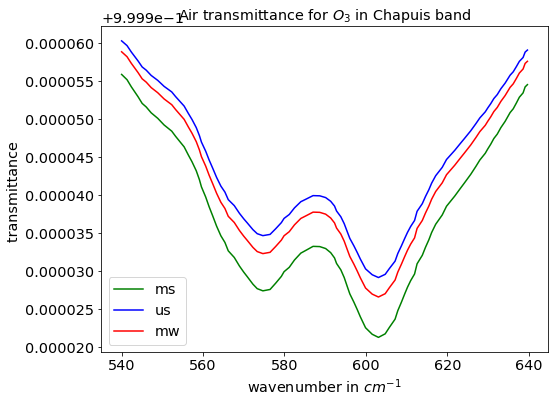

In [71]:
plt.plot(wl_o3,trans_O3Chapuis_ms,'g',label='ms')
plt.plot(wl_o3,trans_O3Chapuis_us,'b',label='us')
plt.plot(wl_o3,trans_O3Chapuis_mw,'r',label='mw')
plt.title('Air transmittance for $O_3$ in Chapuis band')
plt.xlabel('wavenumber in $cm^{-1}$')
plt.ylabel('transmittance ')
plt.legend()

## Absorption coefficient per molecule from Hitran Cross-Section

In [29]:
nu,coef =  wavenum,arr

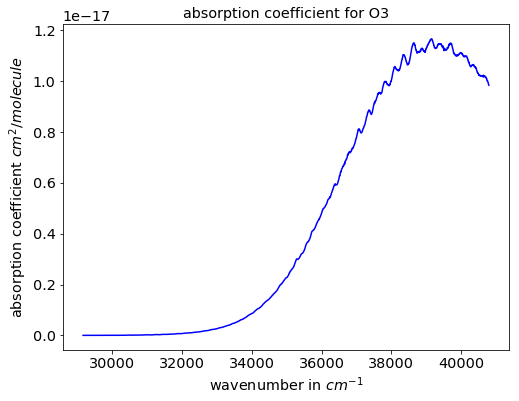

In [30]:
plt.plot(nu,coef,'b-')
plt.title('absorption coefficient for O3')
plt.xlabel('wavenumber in $cm^{-1}$')
plt.ylabel('absorption coefficient $cm^{2}/molecule $')

(200, 400)

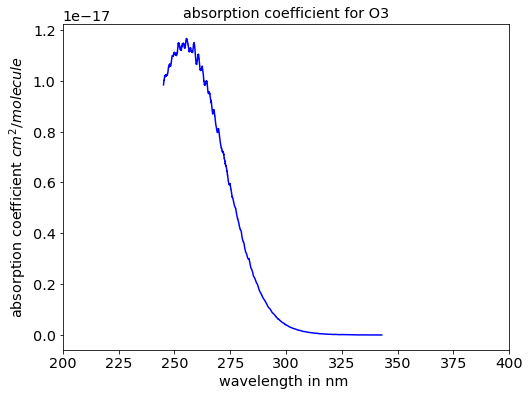

In [31]:
plt.plot(1e7/nu,coef,'b-')
plt.title('absorption coefficient for O3')
plt.xlabel('wavelength in nm ')
plt.ylabel('absorption coefficient $cm^{2}/molecule $')
plt.xlim(200,400)

## Absorption coefficient per length unit (cm)

- Here we need the absorption coefficent from Hapi and the H2O density from LibRadRran

In [32]:
coeff_us_l=coef*d_O3_us # in cm-1
coeff_mw_l=coef*d_O3_mw # in cm-1
coeff_ms_l=coef*d_O3_ms # in cm-1
nu_us=nu
nu_mw=nu
nu_ms=nu

In [33]:
nu_t_us,trans_us = transmittanceSpectrum(nu_us,coeff_us_l,Environment={'l': Distance_source_tel})
nu_t_mw,trans_mw = transmittanceSpectrum(nu_mw,coeff_mw_l,Environment={'l': Distance_source_tel})
nu_t_ms,trans_ms = transmittanceSpectrum(nu_ms,coeff_ms_l,Environment={'l': Distance_source_tel})

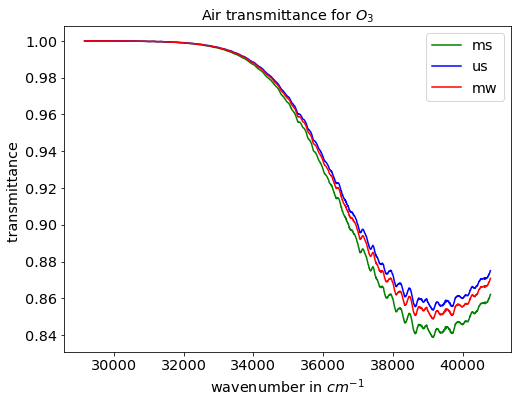

In [34]:
plt.plot(nu_t_ms,trans_ms,'g',label='ms')
plt.plot(nu_t_us,trans_us,'b',label='us')
plt.plot(nu_t_mw,trans_mw,'r',label='mw')
plt.title('Air transmittance for $O_3$')
plt.xlabel('wavenumber in $cm^{-1}$')
plt.ylabel('transmittance ')
plt.legend()

In [35]:
nu_t_us_smooth,trans_us_smooth,i1,i2,slit = convolveSpectrum(nu_t_us,trans_us,SlitFunction=SLIT_RECTANGULAR,Resolution=100.0)

In [36]:
nu_t_mw_smooth,trans_mw_smooth,i1,i2,slit = convolveSpectrum(nu_t_mw,trans_mw,SlitFunction=SLIT_RECTANGULAR,Resolution=100.0)

In [37]:
nu_t_ms_smooth,trans_ms_smooth,i1,i2,slit = convolveSpectrum(nu_t_ms,trans_ms,SlitFunction=SLIT_RECTANGULAR,Resolution=100.0)

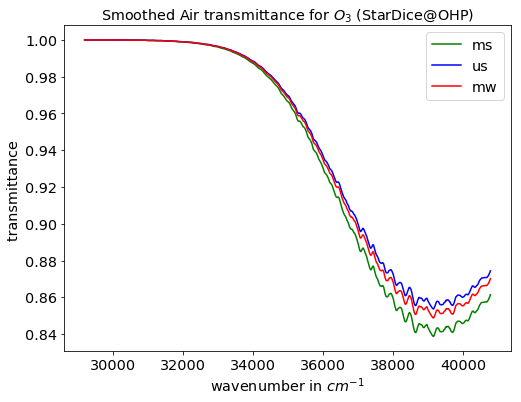

In [38]:
plt.plot(nu_t_ms_smooth,trans_ms_smooth,'g',label='ms')
plt.plot(nu_t_us_smooth,trans_us_smooth,'b',label='us')
plt.plot(nu_t_mw_smooth,trans_mw_smooth,'r',label='mw')
plt.title('Smoothed Air transmittance for $O_3$ (StarDice@OHP)')
plt.xlabel('wavenumber in $cm^{-1}$')
plt.ylabel('transmittance ')
#plt.xlim(12000.,15000.)
plt.legend()

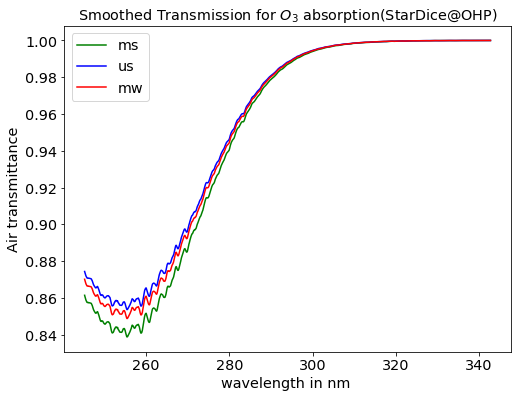

In [39]:
plt.plot(1e7/nu_t_ms_smooth,trans_ms_smooth,'g',label='ms')
plt.plot(1e7/nu_t_us_smooth,trans_us_smooth,'b',label='us')
plt.plot(1e7/nu_t_mw_smooth,trans_mw_smooth,'r',label='mw')
plt.title('Smoothed Transmission for $O_3$ absorption(StarDice@OHP)')
plt.xlabel('wavelength in nm ')
plt.ylabel('Air transmittance')
#plt.xlim(750,780)
plt.legend()